## Uppgift 1 - uppvärmning betyg och prov

- I uppgifterna nedan ska du använda dig av datasetet betyg_o_prov_riksnivå.xlsx. Använd Plotly för att rita diagrammen nedan för de uppgifter som kräver diagram. Använd Pandas för att svara på frågor om datasetet.

## A) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt, flickor och pojkar i samma graf.

In [20]:
import pandas as pd

df_betyg = pd.read_excel("../Uppgift_1/betyg_o_prov_riksnivå.xlsx", sheet_name= "Tabell 1B" , skiprows=7)
df_betyg = df_betyg.iloc[:5]
df_betyg=df_betyg.drop(columns=['Totalt' , 'Flickor', 'Pojkar' , 'Totalt.1' , 'Flickor.1', 'Pojkar.1'] , axis=1)


In [21]:
column_rename = {df_betyg.columns[0]: "Years", df_betyg.columns[1]: "Totalt" ,df_betyg.columns[2]: "Flickor" , df_betyg.columns[3]: "Pojkar"}

df_betyg = df_betyg.rename(columns=column_rename)

df_betyg


,Years,Totalt,Flickor,Pojkar
0,2018/19,24.5,21.7,27.2
1,2019/20,23.9,21.4,26.3
2,2020/21,23.9,21.9,25.9
3,2021/22,25.9,24.2,27.5
4,2022/23,26.8,25.5,28.0


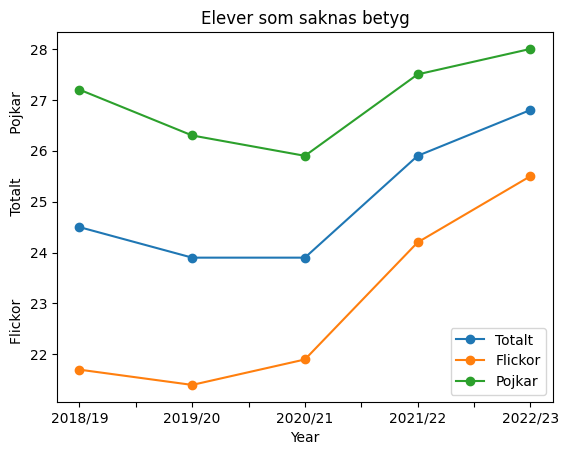

In [22]:
import matplotlib.pyplot as plt 

df_betyg.plot(x="Years", y=["Totalt", "Flickor", "Pojkar"], marker="o")

plt.title('Elever som saknas betyg')
plt.xlabel('Year')
plt.ylabel('Flickor                   Totalt          Pojkar')  
plt.show()

## B) Rita ett linjediagram för meritvärde för 16 ämnen för totalt, flickor och pojkar för läsår 18-23.

In [18]:
df_betyg_tabell2 = pd.read_excel("../Uppgift_1/betyg_o_prov_riksnivå.xlsx", skiprows=7 , sheet_name="Tabell 1B")

df_betyg_tabell2 = df_betyg_tabell2.rename(columns={df_betyg_tabell2.columns[0]: "Years"})

#Droping the rows 
df_betyg_tabell2 = df_betyg_tabell2.iloc[:5]

#Droping the columns 
df_betyg_tabell2 = df_betyg_tabell2.iloc[:,:4]

df_betyg_tabell2


,Years,Totalt,Flickor,Pojkar
0,2018/19,221.7,234.3,209.8
1,2019/20,222.9,235.7,210.9
2,2020/21,223.9,235.4,212.9
3,2021/22,221.2,231.6,211.4
4,2022/23,220.6,229.7,211.9


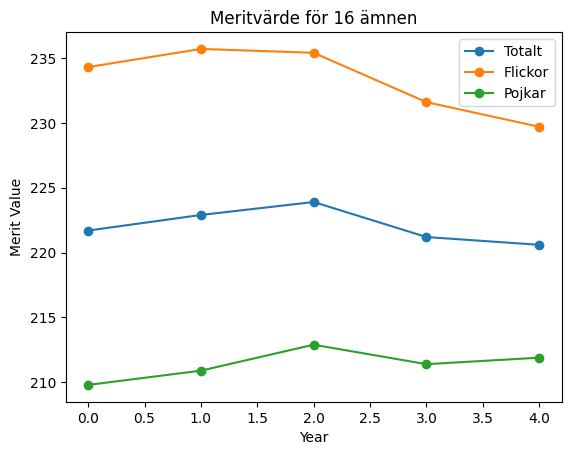

In [46]:
import matplotlib.pyplot as plt

# Assuming df_betyg_tabell2 is your DataFrame
selected_columns = ['Totalt', 'Flickor', 'Pojkar']
df_plot = df_betyg_tabell2[selected_columns]

# Plotting
df_plot.plot(marker='o', linestyle='-')
plt.title('Meritvärde för 16 ämnen')
plt.xlabel('Year')
plt.ylabel('Merit Value')  # Update the ylabel accordingly
plt.show()


##  C) Undersök nu andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data finns för läsår 22/23. Exempel kan man undersöka föräldrarnas utbildningsbakgrund. Rita lämpliga grafer.

In [111]:
df = pd.read_excel("../Uppgift_1/betyg_o_prov_riksnivå.xlsx" , sheet_name="Tabell 1B" , skiprows=7)
df =df.drop(df.index[0:12])
df = df.drop([14, 18, 19, 20, 21, 25, 26, 27])
df = df.iloc[:, [0,-2, -1]]
df = df.reset_index(drop=True)

df= df.rename(columns={df.columns[0]: "Titles" , df.columns[1]: 'Flickor_%' , df.columns[2]: 'Pojkar_%'})
df


,Titles,Flickor_%,Pojkar_%
0,Elever med svensk bakgrund,20.5,22.2
1,Elever med utländsk bakgrund,37.8,42.5
2,Födda i Sverige,30.8,34.3
3,"Födda utomlands, inv. före 2014",29.8,34.0
4,"Födda utomlands, inv. 2014 el. senare",51.1,57.2
5,Förgymnasial utbildning,61.5,65.3
6,Gymnasial utbildning,35.2,39.5
7,Eftergymnasial utbildning,16.1,17.5


In [115]:
import plotly.express as px

colour1 = {"Flickor_%":"#52D097", "Pojkar_%":"#9652D1"} #sätter färg till specifik variabel
fig =px.bar(
    df.reset_index(),
    x="Titles",
    y=["Flickor_%", "Pojkar_%"],
    barmode="group",
    title="Percentage Proportion of student who miss one or more grade,againist the Girls and boys with  \n\n [Elever med svensk bakgrund vs Elever med utländsk bakgrund] , [Födda i Sverige vs Födda utomlands, inv. före 2014 vs Födda utomlands, inv. 2014 el. senare] , [Förgymnasial utbildning vs Gymnasial utbildning vs Eftergymnasial utbildning ]",
    labels={"value": "Proportion(%)", "variable": "Elevtyp"},
    color_discrete_map =colour1 
    
)

fig.update_layout(
    annotations=[
        dict(
            x=1,
            y=1.09,
            xref="paper",
            yref="paper",
            text="Uppgift 1 c)",
            showarrow=False,
            font=dict(size=14)
        )
    ]
)

fig.show()